<h1>Tarea con Honores: Aprendizaje automático con Python</h1>

In [1]:
import opendatasets as od
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<h2>Ejercicio 1: división del conjunto de datos en datos de entrenamiento y de prueba para la regresión</h2>

In [2]:
#Descargar dataSet
od.download("https://www.kaggle.com/datasets/aravinii/house-price-prediction-treated-dataset")

Skipping, found downloaded files in ".\house-price-prediction-treated-dataset" (use force=True to force download)


In [3]:
file =('./house-price-prediction-treated-dataset/df_test.csv') 
newData = pd.read_csv(file) 

In [4]:
newData.head()

,date,price,bedrooms,grade,has_basement,living_in_m2,renovated,nice_view,perfect_condition,real_bathrooms,has_lavatory,single_floor,month,quartile_zone
0,2014-09-26,305000.0,2,1,False,76.18046,False,False,True,1,False,True,9,2
1,2014-05-14,498000.0,3,2,True,210.88981,False,False,False,2,True,True,5,2
2,2015-03-23,590000.0,2,4,False,262.91549,False,False,False,2,True,False,3,2
3,2014-07-15,775000.0,3,3,False,159.79316,False,False,False,1,True,False,7,3
4,2015-04-14,350000.0,2,1,False,92.90300,False,False,False,1,True,True,4,3


In [5]:
# Cambiamos los datos booleanos a formato numerico
newData["has_basement"] = newData["has_basement"].astype(int)
newData["renovated"] = newData["renovated"].astype(int)
newData["nice_view"] = newData["nice_view"].astype(int)
newData["perfect_condition"] = newData["perfect_condition"].astype(int)
newData["has_lavatory"] = newData["has_lavatory"].astype(int)
newData["single_floor"] = newData["single_floor"].astype(int)

In [6]:
X = np.asarray(newData[['grade', 'grade', 'has_basement', 'living_in_m2', 'renovated', 'nice_view', 'perfect_condition', 'real_bathrooms', 'has_lavatory', 'single_floor', 'month', 'quartile_zone']])

In [7]:
y = np.asarray(newData['price'])

In [8]:
#Se normalizan los datos
X = preprocessing.StandardScaler().fit(X).transform(X)

In [9]:
#Separamos en conjunto de test y prueba
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)

<h2>Ejercicio 2: construcción y entrenamiento de un modelo mediante regresión lineal y cálculo de las métricas de evaluación</h2>

In [10]:
from sklearn import linear_model

Text(0, 0.5, 'price')

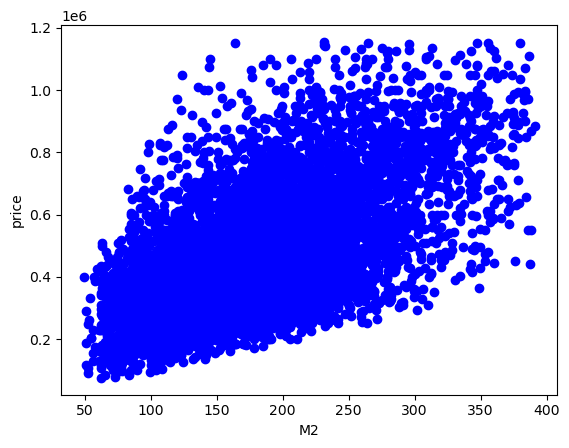

In [11]:
plt.scatter(newData.living_in_m2, newData.price,  color='blue')
#plt.plot(X_train['living_in_m2'].value, regr.coef_[0][0]*X_train['living_in_m2'].value + regr.intercept_[0], '-r')
plt.xlabel("M2")
plt.ylabel("price")

In [12]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [13]:
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [ 23955.29311794  23955.29311794   8813.59335279  72041.5044764
  12142.23606269  30962.56765028  16950.57541258  -5778.79103296
 -10063.52973154  -4015.97112703  -5999.99050083 108563.49833184]
Intercept:  474881.76969932235


In [14]:
predictions = regr.predict(X_test)

In [15]:
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(predictions - y_test)))

Mean Absolute Error: 81285.03


<h2>Ejercicio 3: construcción y entrenamiento de un modelo utilizando KNN y cálculo de las métricas de evaluación</h2>

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [17]:
od.download("https://www.kaggle.com/datasets/gkalpolukcu/knn-algorithm-dataset")

Skipping, found downloaded files in ".\knn-algorithm-dataset" (use force=True to force download)


In [18]:
file =('./knn-algorithm-dataset/KNNAlgorithmDataset.csv') 
dataKNN = pd.read_csv(file) 

In [19]:
dataKNN.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [20]:
dataKNN = dataKNN.dropna(axis='columns')
dataKNN = dataKNN.drop(['id'],axis=1)
dataKNN.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
X = dataKNN.drop('diagnosis', axis=1).values 
y = dataKNN['diagnosis'].values 

In [22]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [23]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [24]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.94736842, 0.97368421, 0.98245614, 0.98245614, 0.96491228,
       0.97368421, 0.95614035, 0.96491228, 0.97368421])

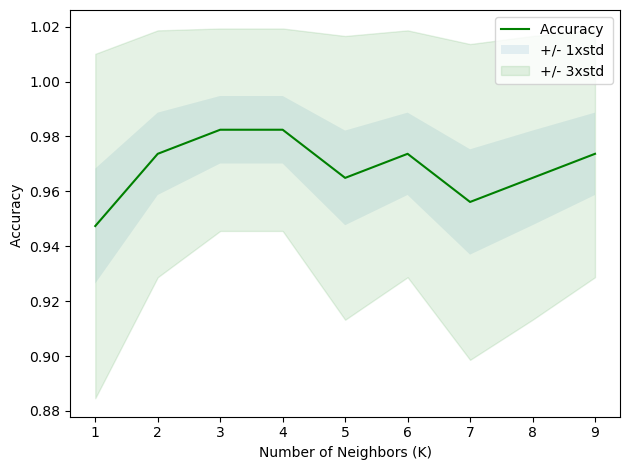

In [25]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [26]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9824561403508771 with k= 3


<h2>Ejercicio 4: construcción y entrenamiento de un modelo mediante árboles de decisión y cálculo de las métricas de evaluación</h2>

In [27]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.preprocessing import LabelEncoder

In [28]:
od.download("https://www.kaggle.com/datasets/reihanenamdari/breast-cancer")

Skipping, found downloaded files in ".\breast-cancer" (use force=True to force download)


In [29]:
file =('./breast-cancer/Breast_Cancer.csv') 
dataDecisionTree = pd.read_csv(file) 

In [30]:
dataDecisionTree.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [31]:
dataDecisionTree = dataDecisionTree.dropna(axis='columns')

In [32]:
#Tratamiento de variables categoricas
# Extraemos las variables objeto y las transformamos en categoricas
object_columns = dataDecisionTree.select_dtypes(['object']).columns
for col in object_columns:
    dataDecisionTree[col] = dataDecisionTree[col].astype('category')
# Extraemos las nuevas variables categoricas y las convertimos en numericas
dataDecisionTree[object_columns] = dataDecisionTree[object_columns].apply(lambda x: x.cat.codes)


In [33]:
dataDecisionTree.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,1,0,0,0,1,3,1,4,1,1,24,1,60,0
1,50,2,1,1,1,2,0,2,1,35,1,1,14,5,62,0
2,58,2,0,2,2,4,0,2,1,63,1,1,14,7,75,0
3,58,2,1,0,0,0,1,3,1,18,1,1,2,1,84,0
4,47,2,1,1,0,1,1,3,1,41,1,1,3,1,50,0


In [34]:
X = dataDecisionTree.drop('Status', axis=1).values 
y = dataDecisionTree['Status'].values 

In [35]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.7, random_state=3)

In [36]:
X_trainset.shape

y_trainset.shape

(1207,)

In [37]:
print('Shape of X test set {}'.format(X_testset.shape),'&','Size of y test set {}'.format(y_testset.shape))

Shape of X test set (2817, 15) & Size of y test set (2817,)


In [38]:
cancerTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
cancerTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [39]:
cancerTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [40]:
predTree = cancerTree.predict(X_testset)

In [41]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9006034788782392


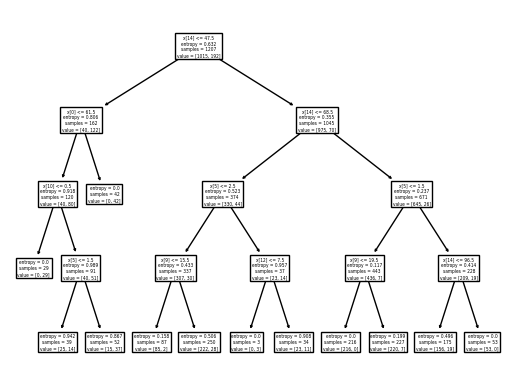

In [42]:
tree.plot_tree(cancerTree)
plt.show()

<h2>Ejercicio 5: construcción y entrenamiento de un modelo mediante regresión logística y cálculo de los parámetros de evaluación</h2>

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, jaccard_score, classification_report, log_loss
import itertools
from imblearn import over_sampling

In [44]:
od.download("https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression")

Skipping, found downloaded files in ".\heart-disease-prediction-using-logistic-regression" (use force=True to force download)


In [45]:
file =('./heart-disease-prediction-using-logistic-regression/framingham.csv') 
logisticRegressionDS = pd.read_csv(file) 

In [46]:
logisticRegressionDS.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [47]:
logisticRegressionDS = logisticRegressionDS.dropna()

In [48]:
X = logisticRegressionDS.drop('TenYearCHD', axis=1).values 
y = logisticRegressionDS['TenYearCHD'].values 

In [49]:
# Equilibramos la muestra
#ros = over_sampling.RandomOverSampler(random_state=0)
#X_resampled, y_resampled = ros.fit_resample(X, y)

In [50]:
#X_train, X_test, y_train, y_test = train_test_split( X_resampled, y_resampled, test_size=0.2, random_state=4)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [51]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [52]:
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

In [53]:
jaccard_score(y_test, yhat,pos_label=0)

0.8388429752066116

In [54]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[  6 114]
 [  3 609]]


Confusion matrix, without normalization
[[  6 114]
 [  3 609]]


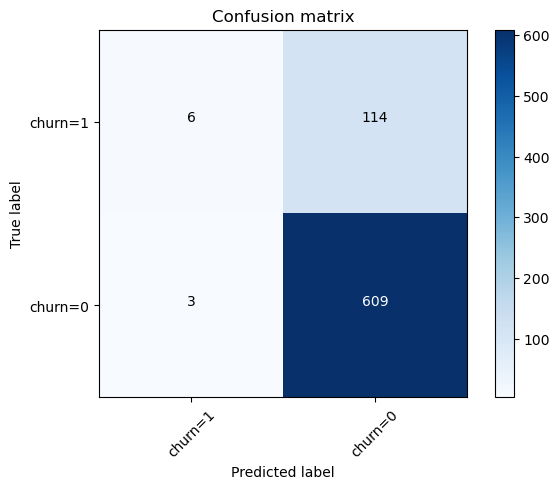

In [55]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [56]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       612
           1       0.67      0.05      0.09       120

    accuracy                           0.84       732
   macro avg       0.75      0.52      0.50       732
weighted avg       0.81      0.84      0.78       732



In [57]:
log_loss(y_test, yhat_prob)

0.42912788245578665

<h2>Ejercicio 6: construcción y entrenamiento de un modelo mediante SVM y cálculo de los parámetros de evaluación</h2>

In [58]:
from sklearn import svm

In [59]:
od.download("https://www.kaggle.com/datasets/erdemtaha/cancer-data")

Skipping, found downloaded files in ".\cancer-data" (use force=True to force download)


In [60]:
file =('./cancer-data/Cancer_Data.csv') 
svmDS = pd.read_csv(file) 

In [61]:
svmDS.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [62]:
svmDS.diagnosis.dtype

dtype('O')

In [63]:
svmDS = svmDS.drop('id', axis=1)
svmDS = svmDS.dropna(axis='columns')
svmDS = svmDS.dropna()
svmDS = svmDS.replace(['M', 'B'], [1, 0])
svmDS.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [64]:
X = svmDS.drop('diagnosis', axis=1).values 
y = svmDS['diagnosis'].values 

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [66]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [67]:
yhat = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        80
           1       0.76      0.82      0.79        34

    accuracy                           0.87       114
   macro avg       0.84      0.86      0.85       114
weighted avg       0.87      0.87      0.87       114

Confusion matrix, without normalization
[[71  9]
 [ 6 28]]


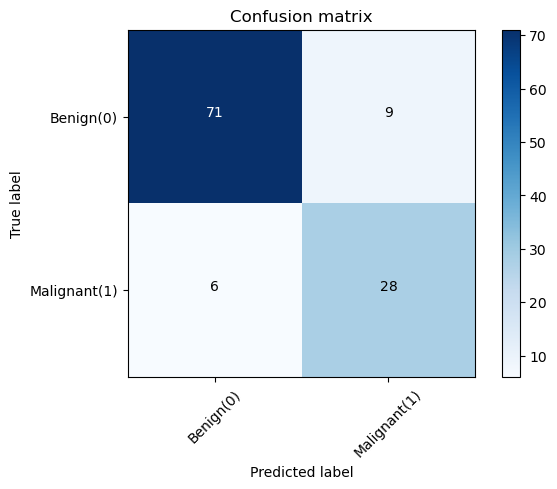

In [70]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(0)','Malignant(1)'],normalize= False,  title='Confusion matrix')

In [76]:
from sklearn.metrics import f1_score, jaccard_score
f1_score(y_test, yhat, average='weighted')
jaccard_score(y_test, yhat,pos_label=0)


0.8255813953488372

In [75]:
jaccard_score(y_test, yhat,pos_label=1)

0.6511627906976745